# Season 2 - Script Analysis

![SegmentLocal](../Images/3.jpg "poster")

![SegmentLocal](../Images/4.gif "GIF")

In [13]:
import os      
import pandas as pd
import plotly.graph_objects as go
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
folder = "../Data/Scripts/Season 2/"
txt_files = os.listdir(folder)   
print(txt_files)

['02x01 - Finding David.txt', '02x02 - Family Dinner.txt', '02x03 - Jazzagals.txt', '02x04 - Estate Sale.txt', "02x05 - Bob's Bagels.txt", '02x06 - Moira vs. Town Council.txt', '02x07 - The Candidate.txt', '02x08 - Milk Money.txt', "02x09 - Moira's Nudes.txt", "02x10 - Ronnie's Party.txt", '02x11 - The Motel Guest.txt', '02x12 - Lawn Signs.txt']


In [4]:
corpus = []

for file_path in txt_files:
    with open(folder+file_path,encoding='utf8') as f_input:
        corpus.append(f_input.read())

print(corpus[0])

No, no, no! No, no, no! No! Noooo! What? My bag! It's gone! What bag? My brown bag! What brown bag? You had a room full of brown bags back home, which brown bag?! My crocodile bag, the one my mother gave me! Oh, it's in the closet, next to my briefcase. That's an ostrich bag. (Hyperventilating, then agonized shriek) Okay, just calm down, breathe, breathe. Breathe... breathe! Okay... David! David must've taken it, along with my last molecule of hope! (Knock on door) Oh Moira, David only took his own bags. Are you kidding?! I bet he's pawned it by now, to pay for manicures. What possible sense would it make for David to take one of your bags? It doesn't... oh towels, great. Mrs. Rose, you got out of bed. Humph! Sorry, am I interrupting something? No, no, we're just, we're looking for something valuable, and um... Your son? Well, no, a brown bag, as a matter of fact. Well... our son, yes. Has anyone heard from David? Oh, to be so naive! He's long gone, darling, escaped, and left us all be

In [5]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/schitts-creek.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: 02x01 - Finding David
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x02 - Family Dinner
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x03 - Jazzagals
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x04 - Estate Sale
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x05 - Bob's Bagels
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x06 - Moira vs. Town Council
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x07 - The Candidate
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x08 - Milk Money
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x09 - Moira's Nudes
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x10 - Ronnie's Party
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x11 - The Motel Guest
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 02x12 - L

In [6]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in 02x01 - Finding David Letter
['David geffen', 'Alexis: David!', 'friend', 'Rose', 'Moira', 'Ted', 'child', 'family', 'grandmother', 'Johnny', 'parents', 'people', 'mother', 'son', 'son', 'darling', 'someone', 'king', 'anyone', 'folks', 'people', 'husbands', 'John', 'Stevie', 'somebody', 'dad', 'mother', 'husband', 'someone', 'woman', 'women', 'hair straightener', 'family', 'mom', 'Mutt', 'guy', 'nobody', 'parents', 'God', 'kid', 'alcoholic', 'persons', 'viceroy', 'people', 'brother', 'pirates', 'Nobody', 'someone', 'someone', 'grandmother', 'friend', 'Roland', 'anyone', 'mother', 'Babe', 'David: Miriam', 'Diane Sawyer', 'nobody', 'many', 'many', 'people', 'son', 'strangers', 'nobody', 'no one', 'no one', 'baby', 'Ritz']

Number Entities Named in 02x01 - Finding David Letter
['one', 'five', 'one', 'one', 'one', 'one', 'three', 'two', 'one', 'three', 'thirty', 'Three', 'one', 'two', 'three', 'one', 'three', 'three', 'a million', 'a hundred', 'one', '48']

Consume

Person Entities Named in 02x06 - Moira vs. Town Council Letter
['David', 'Moira', 'Alexis', 'Goldie Hawn', 'John', 'Mutt', 'someone', 'someone', 'each other', 'Bob: Well', 'Dick Sinson', 'Alexander Wang', 'staff', 'neither', 'Rose', 'mother', 'somebody', 'somebody', 'man', 'Ray', 'Roland', 'friend', 'woody', 'family', 'nobody', 'nobody', 'Alex', 'miners', 'nobody', 'people', 'son', 'son', 'son', 'children', 'Stevie', 'one', 'couple', 'couple', 'man', 'people', 'actor', 'girlfriend', 'citizen', 'men', 'each other', 'everyone', 'dad', 'person', 'Nobody', 'anyone', 'each other', 'Jennifer', 'Pops', 'Twyla', 'rafter', 'doctors', 'women', 'Everyone', 'guys', 'Winnie Mandela', 'Ronnie', 'baby']

Number Entities Named in 02x06 - Moira vs. Town Council Letter
['twenty-five', 'one', 'one', 'one', 'six', '97', 'one', 'two', 'one', 'four', 'one', 'two', 'Two', 'two', 'Two']

Consumer Entities Named in 02x06 - Moira vs. Town Council Letter
['mattress', 'bedding', 'mattress', 'candles', 'mattress',

Person Entities Named in 02x10 - Ronnie's Party Letter
['human being', 'Ronnie', 'people', 'Doris', 'John', 'Moira', 'IT manager', 'Alexis', 'Jocelyn', 'David', 'Gerald', 'Albert', 'two', 'two', 'two', 'stepdaughter', 'people', 'candidate', 'Ted', 'everyone', 'someone', 'nephew', 'Everyone', 'friends', 'boss', 'someone', 'women', 'children', 'wife', 'woman', 'someone', 'someone', 'secretary', 'I-i', 'girl friends', 'i-i', 'women', 'women', 'man', 'each other', 'stepdaughter', 'members', 'candidate', 'wife', 'man', 'some', 'women', 'friends', 'star', 'few', 'ex-wife', 'Pamphlets', 'sultan', 'doctor', 'entrepreneur', 'Karen', 'Kay', 'woman', 'Helen', 'serial killer', 'kids', 'women', 'women', 'women', 'customers', 'people', 'everyone', 'sister', 'anyone', 'no one', 'everyone', 'Women', 'woman', 'friends', 'M-Moira', 'family', 'family', 'family', 'community', 'women', 'women', 'women', 'women', 'women', 'actress', 'staff', 'Household staff', 'ladies', 'accountants', 'men', 'everyone', 'Go

In [7]:
types = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [9]:
fig = go.Figure(data=[go.Pie(labels=types, values=total_num, title="Pie Chart of Entity Analysis of Season 2")])
fig.show()

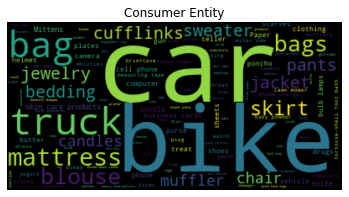

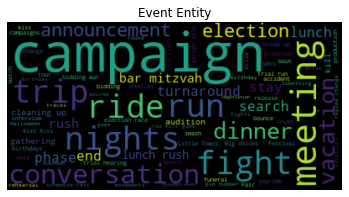

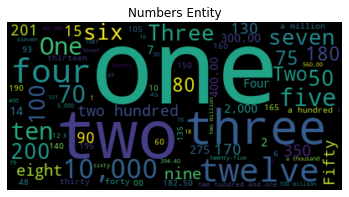

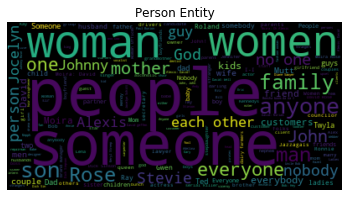

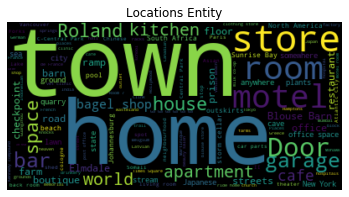

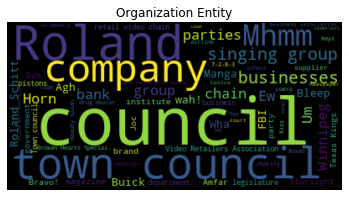

In [10]:
wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
a = []
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    
    
    
    for j in range(len(response2.tokens)):
        a.append((response2.tokens[j].part_of_speech))
    #    print('Syntax: {}'.format(response2[j]))    
    #print('Sentiment: {}'.format(response1))
    
    #print('Sentiment: {}'.format(response3))
print(a)

[tag: X
, tag: PUNCT
, tag: X
, tag: PUNCT
, tag: X
, tag: PUNCT
, tag: X
, tag: PUNCT
, tag: X
, tag: PUNCT
, tag: X
, tag: PUNCT
, tag: X
, tag: PUNCT
, tag: X
, tag: PUNCT
, tag: PRON
person: THIRD
, tag: PUNCT
, tag: PRON
case: GENITIVE
number: SINGULAR
person: FIRST
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: PRON
case: NOMINATIVE
gender: NEUTER
number: SINGULAR
person: THIRD
, tag: VERB
mood: INDICATIVE
number: SINGULAR
person: THIRD
tense: PRESENT
, tag: VERB
tense: PAST
, tag: PUNCT
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: PRON
case: GENITIVE
number: SINGULAR
person: FIRST
, tag: ADJ
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: DET
, tag: ADJ
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: PRON
case: NOMINATIVE
person: SECOND
, tag: VERB
mood: INDICATIVE
tense: PAST
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: ADJ
, tag: ADP
, tag: ADJ
, tag: NOUN
number: PLURAL
, tag: ADV
, tag: ADV
number: SINGULAR
, tag: PUNCT
, tag: DET
, tag: ADJ
, tag: NOUN
